## Imports

In [5]:
!pip install jupyternotify
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [6]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
#import Components.Data_Augmentation as Data_Augmentation
import Components.wrapper as wrapper


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
#importlib.reload(Data_Augmentation)
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(wrapper)

<module 'Components.wrapper' from '../Components/wrapper.py'>

## Data Preprocessing

### Data Import

In [7]:
x_train, y_train = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()

## Model

### Pipeline Setup

In [8]:
# we need: -scaling transformer -weighted loss function -multi-class model 
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  SVC(C=1.0,kernel='rbf',gamma='scale',shrinking=True,cache_size=1000,class_weight='balanced'))
                ])


### Grid search

In [9]:
%%notify

gamma_range = np.logspace(-5, -3, 3)
parameters = [{'classification__kernel': ['rbf'], 'classification__gamma': [0.0001,0.0005,0.001],'classification__C': [2.0,3.0,4.0,6.0,7.0,8.0]},
              {'classification__kernel': ['linear'], 'classification__C': [0.0005,0.002,0.005]}
             ]

clf = GridSearchCV(pipe, parameters,cv=10,n_jobs=16,scoring='balanced_accuracy')


# View The Best Parameters
print(clf.best_params_)

{'classification__C': 5.0, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}


<IPython.core.display.Javascript object>

In [10]:
print(clf.best_score_)

0.6977777777777777


In [11]:
results = pd.DataFrame(clf.cv_results_)

In [1]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth",200) 
results[["params","mean_test_score"]].query('mean_test_score >= 0.69')

NameError: name 'pd' is not defined

## Final prediction

In [ ]:
clf.fit(x_train, np.ravel(y_train)

Train Score: 0.8258333333333333


FileNotFoundError: [Errno 2] No such file or directory: '../Predictions/SVM_optimised.csv'

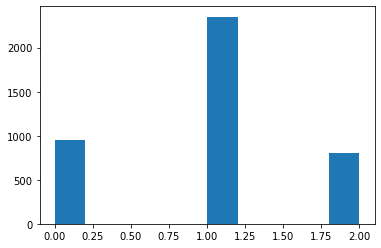

In [14]:

print("Train Score:", balanced_accuracy_score(y_train, clf.predict(x_train)))

y_pred = clf.predict(x_test)
plt.hist(y_pred)


y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])


In [15]:
y_pred_pd.to_csv('../Predictions/SVM_optimised_3.csv', index_label='id')